In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [2]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

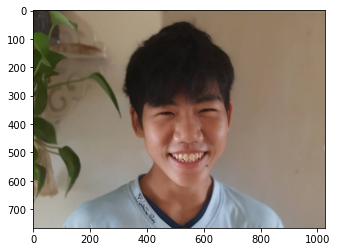

In [3]:
# import the image
from skimage import io
image = io.imread('d:/python/picture/Winston.jpg') 
plt.imshow(image)

In [4]:
image_gray = color.rgb2gray(image) 
#image_show(image_gray);

In [5]:
def circle_points(resolution, center, radius):
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians) #polar co-ordinates
    r = center[0] + radius*np.sin(radians)

    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [445, 545], 180)[:-1]

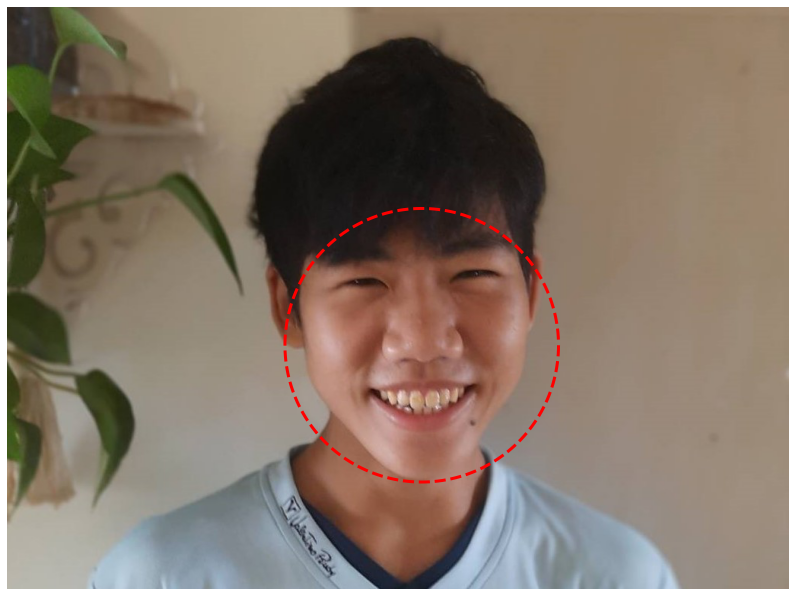

In [6]:
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

<ipython-input-7-34d2cc9b80dc>:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = seg.active_contour(image_gray, points)


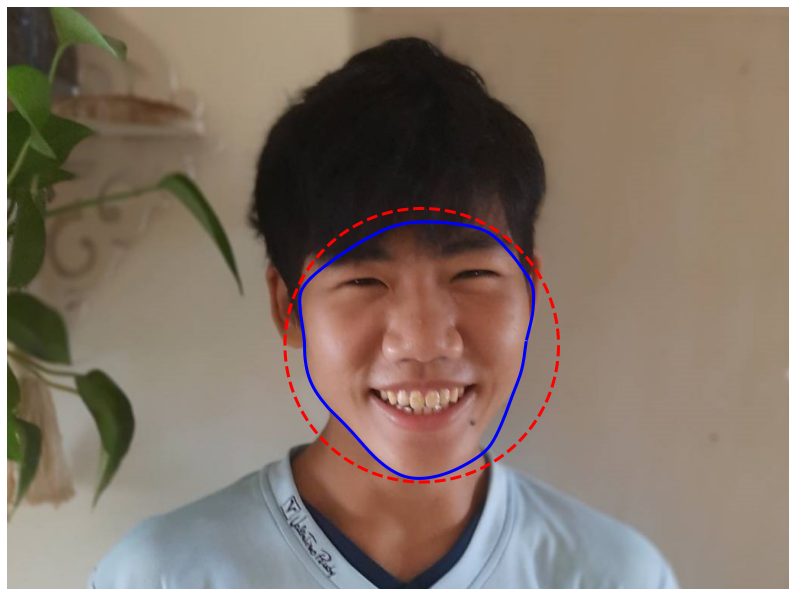

In [7]:
snake = seg.active_contour(image_gray, points)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)

<ipython-input-8-a2f31758c4de>:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = seg.active_contour(image_gray, points,alpha=0.0135,beta=0.14)


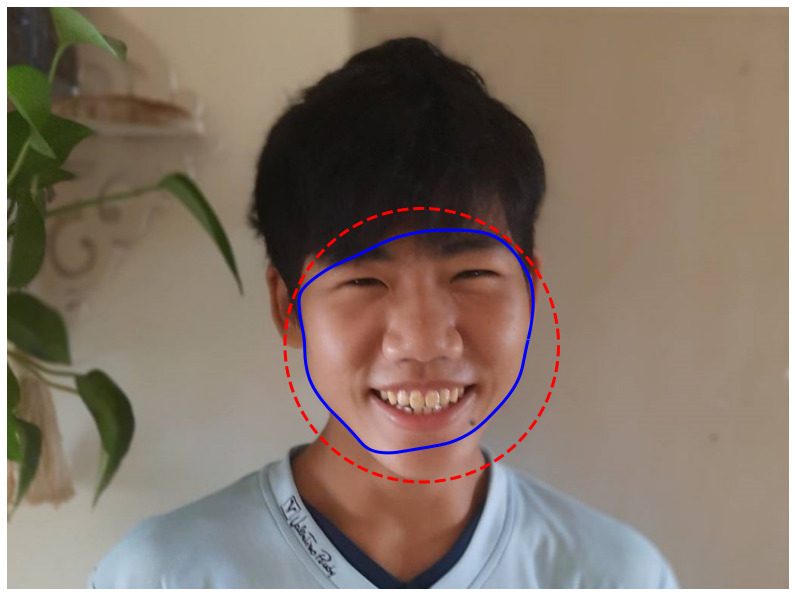

In [8]:
snake = seg.active_contour(image_gray, points,alpha=0.0135,beta=0.14)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)

In [9]:
#image_labels = np.zeros(image_gray.shape, dtype=np.uint8)

In [10]:
#indices = draw.circle_perimeter(465, 565, 100) 
#image_labels[indices] =1
#image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 1
#image_show(image_labels);

In [11]:
#image_segmented = seg.random_walker(image_gray, image_labels)
#fig, ax = image_show(image_gray)
#ax.imshow(image_segmented == 1, alpha=0.3);

In [12]:
#image_segmented = seg.random_walker(image_gray, image_labels, beta = 3000)
#fig, ax = image_show(image_gray)
#ax.imshow(image_segmented == 1, alpha=0.3);

In [9]:
image_slic = seg.slic(image,n_segments=155)

<ipython-input-9-09299f173385>:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  image_slic = seg.slic(image,n_segments=155)


<ipython-input-10-d6b77417a495>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_show(color.label2rgb(image_slic, image, kind='avg'))


(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

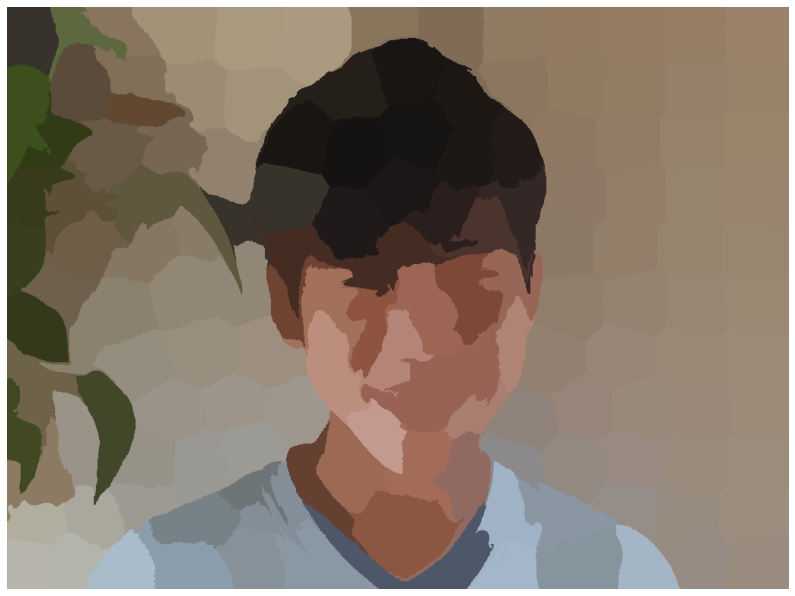

In [10]:
image_show(color.label2rgb(image_slic, image, kind='avg'))

In [11]:
image_felzenszwalb = seg.felzenszwalb(image) 
#image_show(image_felzenszwalb);

In [12]:
np.unique(image_felzenszwalb).size

11603

<ipython-input-13-5706443a7927>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_felzenszwalb_colored = color.label2rgb(image_felzenszwalb, image, kind='avg')


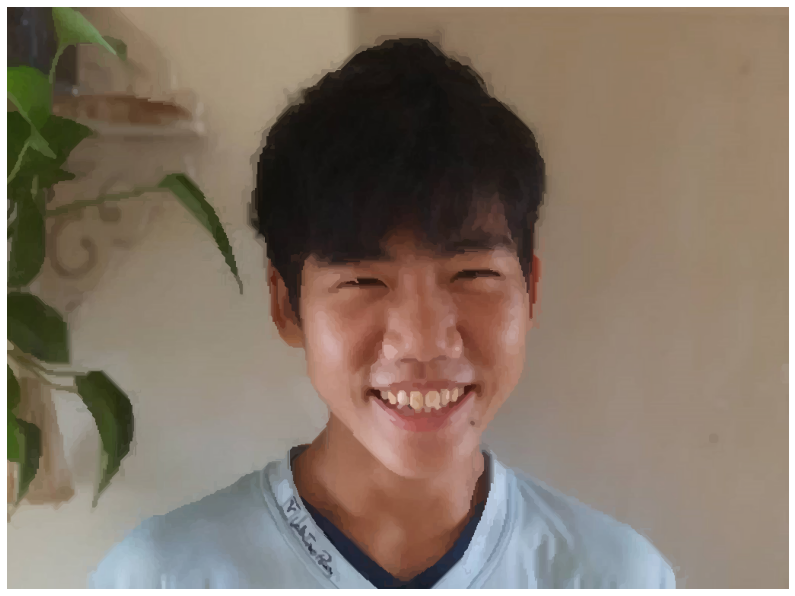

In [13]:
image_felzenszwalb_colored = color.label2rgb(image_felzenszwalb, image, kind='avg')
image_show(image_felzenszwalb_colored);

In [ ]:
# https://www.luoow.com/dc_tw/109971587

In [ ]:
#picture: Winston.jpg